In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv('data/electric_production.csv', index_col=0)

In [9]:
# df.set_index('DATE', inplace=True)
df.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [11]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01',
               '1939-05-01', '1939-06-01', '1939-07-01', '1939-08-01',
               '1939-09-01', '1939-10-01',
               ...
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01'],
              dtype='datetime64[ns]', name='DATE', length=956, freq=None)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 956 entries, 1939-01-01 to 2018-08-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  956 non-null    float64
dtypes: float64(1)
memory usage: 14.9 KB


In [13]:
# df.rename(columns={'IPG2211A2N': 'Energy Production'}, inplace=True)
df.columns = ['Energy Production']
df.head()

,Energy Production
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [14]:
df.tail()

,Energy Production
DATE,
2018-04-01,93.1969
2018-05-01,93.2673
2018-06-01,103.6640
2018-07-01,113.5843
2018-08-01,113.3052


In [15]:
df_1985 = df[df.index.year >= 1985]
df_1985.head()

,Energy Production
DATE,
1985-01-01,72.6803
1985-02-01,70.8479
1985-03-01,62.6166
1985-04-01,57.6106
1985-05-01,55.4467


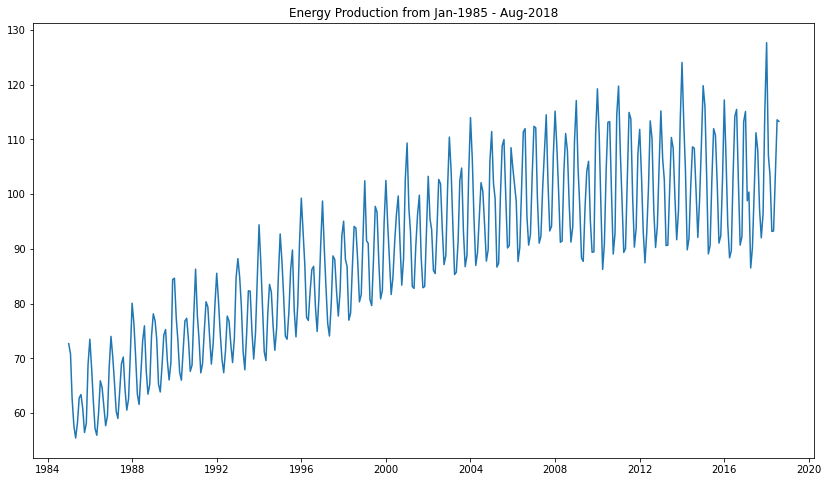

In [16]:
plt.figure(figsize=(14, 8))
plt.plot(df_1985)
plt.title('Energy Production from Jan-1985 - Aug-2018')
plt.show()

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
result = seasonal_decompose(df_1985, model='multiplicative')
result

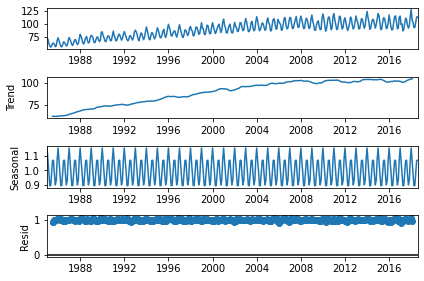

In [19]:
result.plot()
plt.show()

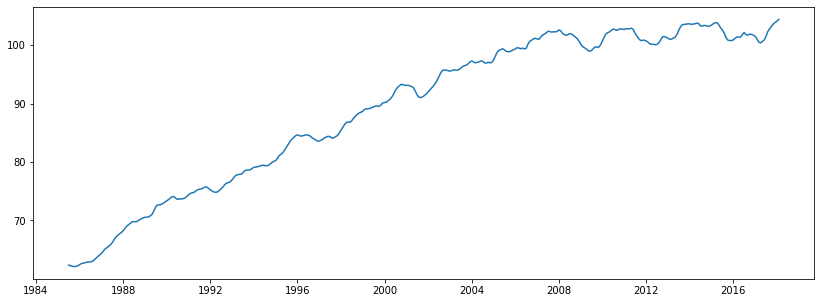

In [20]:
# xem xét yếu tố trend
plt.figure(figsize=(14, 5))
plt.plot(result.trend)
plt.show()

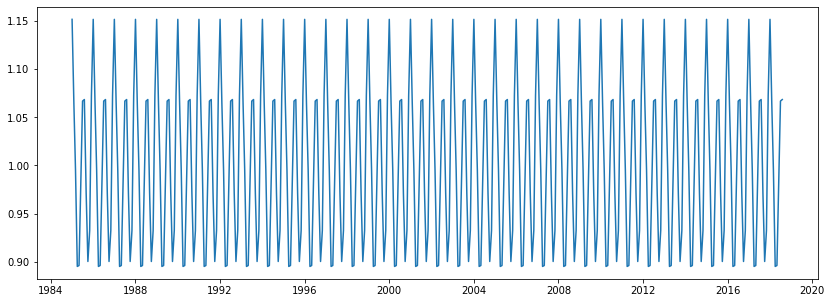

In [21]:
# xem xét yếu tố seasonal
plt.figure(figsize=(14, 5))
plt.plot(result.seasonal)
plt.show()

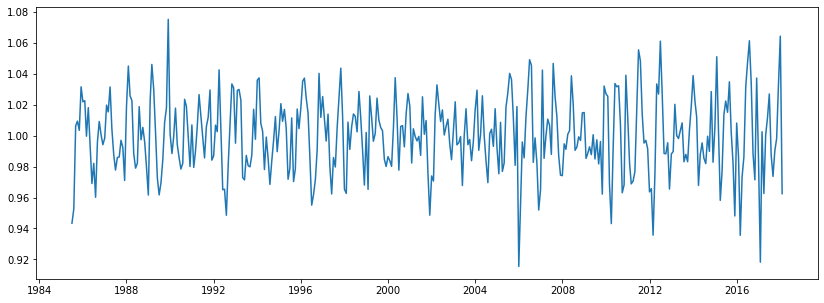

In [22]:
# xem xét yếu tố resid
plt.figure(figsize=(14, 5))
plt.plot(result.resid)
plt.show()

In [23]:
#nhận xét: ???


### áp dụng auto_arima để xây dựng mô hình

In [24]:
from pmdarima import auto_arima

In [26]:
stepwise_model = auto_arima(df_1985, start_p=2, start_q=2,
                           max_p=5, max_q=5, m=12, start_P=1,
                            seasonal=True, d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1827.308, Time=1.97 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2055.116, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1980.491, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1876.298, Time=0.40 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1826.789, Time=1.59 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=inf, Time=1.31 sec
 ARIMA(2,1,2)(0,1,2)[12]             : AIC=1826.372, Time=4.54 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=1825.064, Time=5.23 sec
 ARIMA(2,1,2)(2,1,2)[12]             : AIC=1812.125, Time=6.35 sec
 ARIMA(2,1,2)(2,1,1)[12]             : AIC=1815.973, Time=4.54 sec
 ARIMA(1,1,2)(2,1,2)[12]             : AIC=1810.891, Time=4.87 sec
 ARIMA(1,1,2)(1,1,2)[12]             : AIC=1824.617, Time=4.21 sec
 ARIMA(1,1,2)(2,1,1)[12]             : AIC=1815.075, Time=3.02 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1827.134, Time=1.31 sec
 ARIMA(0,1,2)(2,1,2)[12]

In [27]:
print(stepwise_model.aic())

1809.1044498659835


In [32]:
# chuẩn bị dữ liệu 
train = df_1985.loc['1985-01-01':'2015-01-01'] # lấy từ 1/1985 -> 12/2014
test = df_1985.loc['2015-01-01':] # lấy từ 01/2015 đến hết

In [33]:
test.head()

,Energy Production
DATE,
2015-01-01,119.8260
2015-02-01,116.0253
2015-03-01,103.9265
2015-04-01,89.0847
2015-05-01,90.6408


In [35]:
len(test) # số mẫu trong test

44

### Bước 2: Fit model

In [36]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

### Bước 3: Dự đoán kết qủa

In [37]:
future_forecast = stepwise_model.predict(n_periods = len(test)) # số khoảng thời gian cần dự đoán

In [38]:
future_forecast

array([109.60540073, 100.70627172,  89.71136238,  92.06894709,
       103.03753962, 112.17579589, 111.30476015, 100.01379987,
        91.66410881,  96.12872192, 110.27753893, 118.76801868,
       108.64362211, 100.21333199,  89.93911924,  92.28891495,
       103.14680093, 113.09871264, 111.66337298,  99.99295268,
        91.75643788,  96.10083933, 110.7962965 , 119.35702643,
       109.05569701, 101.07552482,  90.27863221,  92.55439539,
       103.04898633, 112.89399841, 111.30885997, 100.28327875,
        92.12162492,  97.03966179, 110.92734639, 120.15301931,
       109.7300496 , 101.87582883,  90.60725297,  92.84447208,
       103.16855204, 112.74570234, 111.22367825, 100.64891579])

In [39]:
#trực quan hóa kết quả để nhận xét

### Bước 4: Trực quan hóa dữ liệu

In [40]:
future_forecast = pd.DataFrame(future_forecast, index = test.index, columns=['Prediction'])
future_forecast.head()

,Prediction
DATE,
2015-01-01,109.605401
2015-02-01,100.706272
2015-03-01,89.711362
2015-04-01,92.068947
2015-05-01,103.037540


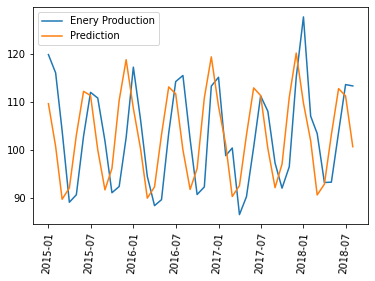

In [42]:
plt.plot(test, label='Enery Production')
plt.plot(future_forecast, label='Prediction')
plt.xticks(rotation=85)
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
mae = mean_absolute_error(test, future_forecast)
mae

8.801487017657406

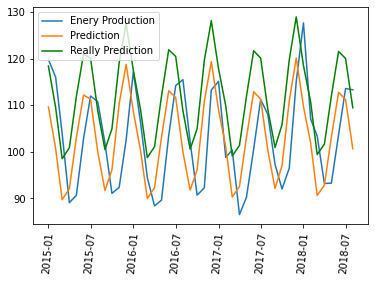

In [46]:
plt.plot(test, label='Enery Production')
plt.plot(future_forecast, label='Prediction')
plt.plot(future_forecast + mae, label='Really Prediction', color='green')
plt.xticks(rotation=85)
plt.legend()
plt.show()

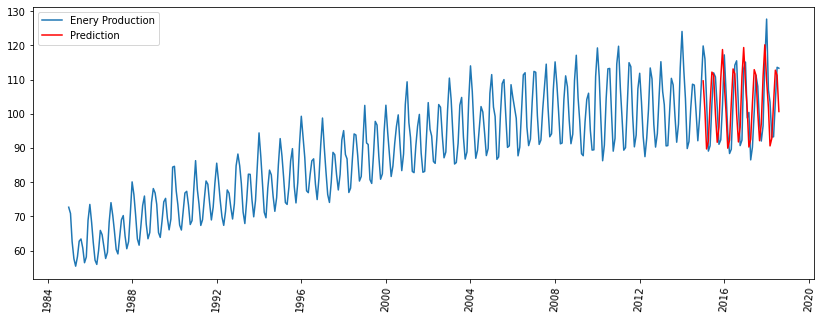

In [47]:
plt.figure(figsize=(14, 5))
plt.plot(df_1985, label='Enery Production')
plt.plot(future_forecast, label='Prediction', color='red')
plt.xticks(rotation=85)
plt.legend()
plt.show()

### dự đoán cho 12 tháng tiếp theo

In [48]:
test.tail()

,Energy Production
DATE,
2018-04-01,93.1969
2018-05-01,93.2673
2018-06-01,103.6640
2018-07-01,113.5843
2018-08-01,113.3052


In [49]:
future_forecast = stepwise_model.predict(n_periods = len(test)+12) # số khoảng thời gian cần dự đoán
future_forecast

array([109.60540073, 100.70627172,  89.71136238,  92.06894709,
       103.03753962, 112.17579589, 111.30476015, 100.01379987,
        91.66410881,  96.12872192, 110.27753893, 118.76801868,
       108.64362211, 100.21333199,  89.93911924,  92.28891495,
       103.14680093, 113.09871264, 111.66337298,  99.99295268,
        91.75643788,  96.10083933, 110.7962965 , 119.35702643,
       109.05569701, 101.07552482,  90.27863221,  92.55439539,
       103.04898633, 112.89399841, 111.30885997, 100.28327875,
        92.12162492,  97.03966179, 110.92734639, 120.15301931,
       109.7300496 , 101.87582883,  90.60725297,  92.84447208,
       103.16855204, 112.74570234, 111.22367825, 100.64891579,
        92.49915232,  97.76231619, 111.06693071, 120.63874793,
       110.19466619, 102.29364315,  90.90116466,  93.1363162 ,
       103.46045657, 112.91838773, 111.46946897, 100.9757559 ])

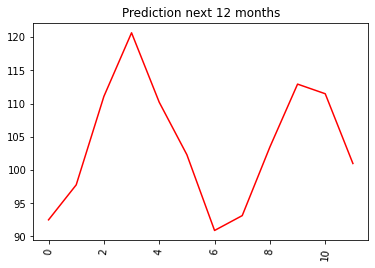

In [51]:
plt.plot(future_forecast[len(test):], label='Prediction', color='red')
plt.xticks(rotation=85)
plt.title('Prediction next 12 months')
plt.show()

In [52]:
future_forecast[len(test):]

array([ 92.49915232,  97.76231619, 111.06693071, 120.63874793,
       110.19466619, 102.29364315,  90.90116466,  93.1363162 ,
       103.46045657, 112.91838773, 111.46946897, 100.9757559 ])

In [53]:
months = pd.date_range('2018-09-01', '2019-08-01', freq='MS')
months

DatetimeIndex(['2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', freq='MS')

In [54]:
new_predict = pd.DataFrame({
    'DATE': months,
    'Energy Production': future_forecast[len(test):]
})
new_predict

,DATE,Energy Production
0,2018-09-01,92.499152
1,2018-10-01,97.762316
2,2018-11-01,111.066931
3,2018-12-01,120.638748
4,2019-01-01,110.194666
5,2019-02-01,102.293643
6,2019-03-01,90.901165
7,2019-04-01,93.136316
8,2019-05-01,103.460457
9,2019-06-01,112.918388


In [55]:
new_predict.set_index('DATE', inplace=True)
new_predict.head()

,Energy Production
DATE,
2018-09-01,92.499152
2018-10-01,97.762316
2018-11-01,111.066931
2018-12-01,120.638748
2019-01-01,110.194666


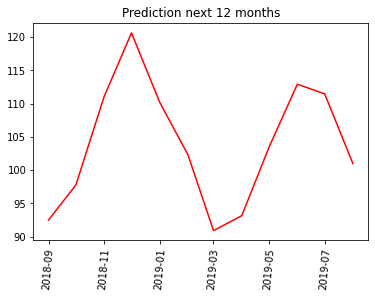

In [56]:
plt.plot(new_predict, label='Prediction', color='red')
plt.xticks(rotation=85)
plt.title('Prediction next 12 months')
plt.show()

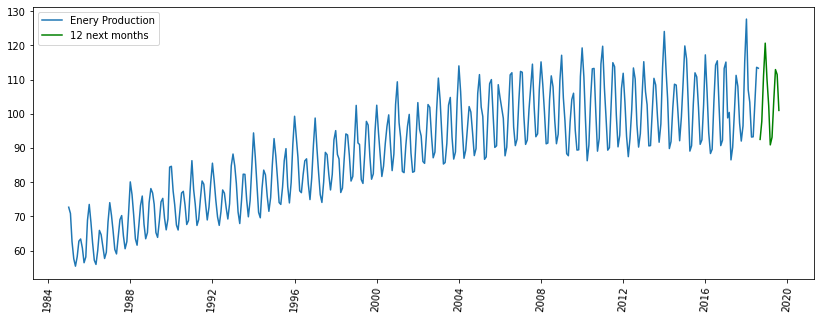

In [58]:
plt.figure(figsize=(14, 5))
plt.plot(df_1985, label='Enery Production')
# plt.plot(future_forecast, label='Prediction', color='red')
plt.plot(new_predict, label='12 next months', color='green')
plt.xticks(rotation=85)
plt.legend()
plt.show()